Solar Radiation Analysis

IMPORTING IMPORTANT LIBRARIES

In [16]:
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('dark_background')
from scipy.stats import zscore

EXPLORATORY DATA ANALYSIS
IMPORTING DATASET

In [4]:
benin = pd.read_csv("../data/benin_raw.csv", parse_dates=['Timestamp'], encoding='ISO-8859-1', low_memory=False)
benin.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20932\124227186.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  benin = pd.read_csv("../data/benin_raw.csv", parse_dates=['Timestamp'], encoding='ISO-8859-1', low_memory=False)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,yyyy-mm-dd hh:mm,W/m²,W/m²,W/m²,W/m²,W/m²,°C,%,m/s,m/s,m/s,°N (to east),°,hPa,1 or 0,mm/min,°C,°C,NaN
1,2021-08-09 00:01,-1.2,-0.2,-1.1,0,0,26.2,93.4,0,0.4,0.1,122.1,0,998,0,0,26.3,26.2,NaN
2,2021-08-09 00:02,-1.1,-0.2,-1.1,0,0,26.2,93.6,0,0,0,0,0,998,0,0,26.3,26.2,NaN
3,2021-08-09 00:03,-1.1,-0.2,-1.1,0,0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0,26.4,26.2,NaN
4,2021-08-09 00:04,-1.1,-0.1,-1,0,0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0,26.4,26.3,NaN


In [5]:
print("Summary Statistics:")
print(benin.describe())

Summary Statistics:
       Comments
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN


OBSERVATIONS

The Comments column miss all values

In [6]:
missing = benin.isna().sum()
print("\nMissing Values:")
print(missing[missing > 0])


Missing Values:
Comments    525601
dtype: int64


In [8]:
threshold = 0.05 * len(benin)
print("\nColumns with >5% Missing Values:")
print(missing[missing > threshold])


Columns with >5% Missing Values:
Comments    525601
dtype: int64


In [9]:
benin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525601 non-null  object 
 1   GHI            525601 non-null  object 
 2   DNI            525601 non-null  object 
 3   DHI            525601 non-null  object 
 4   ModA           525601 non-null  object 
 5   ModB           525601 non-null  object 
 6   Tamb           525601 non-null  object 
 7   RH             525601 non-null  object 
 8   WS             525601 non-null  object 
 9   WSgust         525601 non-null  object 
 10  WSstdev        525601 non-null  object 
 11  WD             525601 non-null  object 
 12  WDstdev        525601 non-null  object 
 13  BP             525601 non-null  object 
 14  Cleaning       525601 non-null  object 
 15  Precipitation  525601 non-null  object 
 16  TModA          525601 non-null  object 
 17  TModB          525601 non-nul

OBSERVATIONS

* The dataset has 19 column and 525601 rows
* Also there are two datatypes float and objects(We need to change the object data types into numberic to do various analysis)

In [10]:
benin.drop(columns=['Comments'], inplace=True)
print("Because the comment section is useless for our operation.")

Because the comment section is useless for our operation.


In [11]:
benin.columns


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')

In [12]:
# Convert all numeric columns from object to float
for col in benin.columns:
    if col != "Timestamp":  
        benin[col] = pd.to_numeric(benin[col], errors='coerce')


In [15]:
benin['Timestamp'] = pd.to_datetime(benin['Timestamp'], errors='coerce')
benin.dtypes


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20932\303562800.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  benin['Timestamp'] = pd.to_datetime(benin['Timestamp'], errors='coerce')


Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
WD                      float64
WDstdev                 float64
BP                      float64
Cleaning                float64
Precipitation           float64
TModA                   float64
TModB                   float64
dtype: object

Outlier Detection using Z-Score

In [33]:
# Columns to analyze for outliers
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores for each column and flag outliers (Z > 3 or < -3)
for col in cols_to_check:
    benin[f'{col}_zscore'] = zscore(benin[col].fillna(benin[col].median()))
    outliers = benin[np.abs(benin[f'{col}_zscore']) > 3]
    print(f'{col} → {len(outliers)} outliers (|Z| > 3)')

GHI → 89 outliers (|Z| > 3)
DNI → 0 outliers (|Z| > 3)
DHI → 3738 outliers (|Z| > 3)
ModA → 27 outliers (|Z| > 3)
ModB → 63 outliers (|Z| > 3)
WS → 3109 outliers (|Z| > 3)
WSgust → 3500 outliers (|Z| > 3)


In [35]:
cols = ['GHI', 'DNI', 'DHI']
zscores = benin[cols].apply(lambda x: zscore(x.fillna(x.median())))
zscores.describe()

,GHI,DNI,DHI
count,5.256010e+05,5.256010e+05,5.256010e+05
mean,1.161524e-16,-1.129079e-16,-1.488135e-16
std,1.000001e+00,1.000001e+00,1.000001e+00
min,-7.654345e-01,-6.686299e-01,-8.063398e-01
25%,-7.325170e-01,-6.407364e-01,-7.401734e-01
50%,-7.210412e-01,-6.392080e-01,-7.168576e-01
75%,7.333687e-01,5.617391e-01,6.360874e-01
max,3.540718e+00,2.999933e+00,4.057205e+00


Drop temporary Z-score columns

In [37]:
benin.drop(columns=[f"{col}_zscore" for col in cols_to_check], inplace=True)

Fill missing values in key columns using median

In [38]:
benin[cols_to_check] = benin[cols_to_check].apply(lambda x: x.fillna(x.median()))

Save Cleaned Data

In [39]:
benin.to_csv("../data/benin_clean.csv", index=False)

Time Series Analysis

In [41]:
benin['Timestamp'] = pd.to_datetime(benin['Timestamp'])

In [43]:
def data_grouper(data: pd.DataFrame) -> tuple:
    '''
    This function groups timeseries data by day, months and year

    Returns:
        tuple: A tuple containing three DataFrames - grouped by day, month, and year.
    '''

    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    data.index = data['Timestamp']

    day_data = data.groupby([data.index.month, data.index.day, data.index.year])[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
    month_data = data.groupby([data.index.month, data.index.year])[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
    year_data = data.groupby([data.index.year])[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

    return day_data, month_data, year_data


In [48]:
def plot_timeseries(data):

    day_data, month_data, year_data = data_grouper(data)
    day_data['Date'] = day_data.index.to_series().apply(
    lambda idx: pd.Timestamp(year=int(idx[2]), month=int(idx[0]), day=int(idx[1])).date()
)


    # plot for day data 
    fig, axes = plt.subplots(nrows=4, figsize=(10, 12))
    cols = ['GHI', 'DNI', 'DHI', 'Tamb']
    plt.suptitle('Day Data', fontsize = 16)
    for i, col in enumerate(cols):
        axes[i].plot(day_data['Date'], day_data[col])
        axes[i].set_ylabel(col)
        axes[i].tick_params(axis='x', rotation=45)

    plt.xlabel('Timestamp')
    plt.tight_layout()
    plt.show()

    # plot for month data
    fig, axes = plt.subplots(nrows=4, figsize=(10, 12))
    cols = ['GHI', 'DNI', 'DHI', 'Tamb']
    plt.suptitle('Month Data', fontsize = 16)
    for i, col in enumerate(cols):
        month_data[col].plot(ax = axes[i])
        axes[i].set_ylabel(col)
        axes[i].tick_params(axis='x', rotation=45)

    plt.xlabel('Timestamp')
    plt.tight_layout()
    plt.show()    

    # plot for year data
    fig, axes = plt.subplots(nrows=4, figsize=(10, 12), )
    cols = ['GHI', 'DNI', 'DHI', 'Tamb']
    plt.suptitle('Year Data', fontsize = 16)
    for i, col in enumerate(cols):
        year_data[col].plot(ax = axes[i])
        axes[i].set_ylabel(col)
        axes[i].tick_params(axis='x', rotation=45)

    plt.xlabel('Timestamp')
    plt.tight_layout()
    plt.show()    

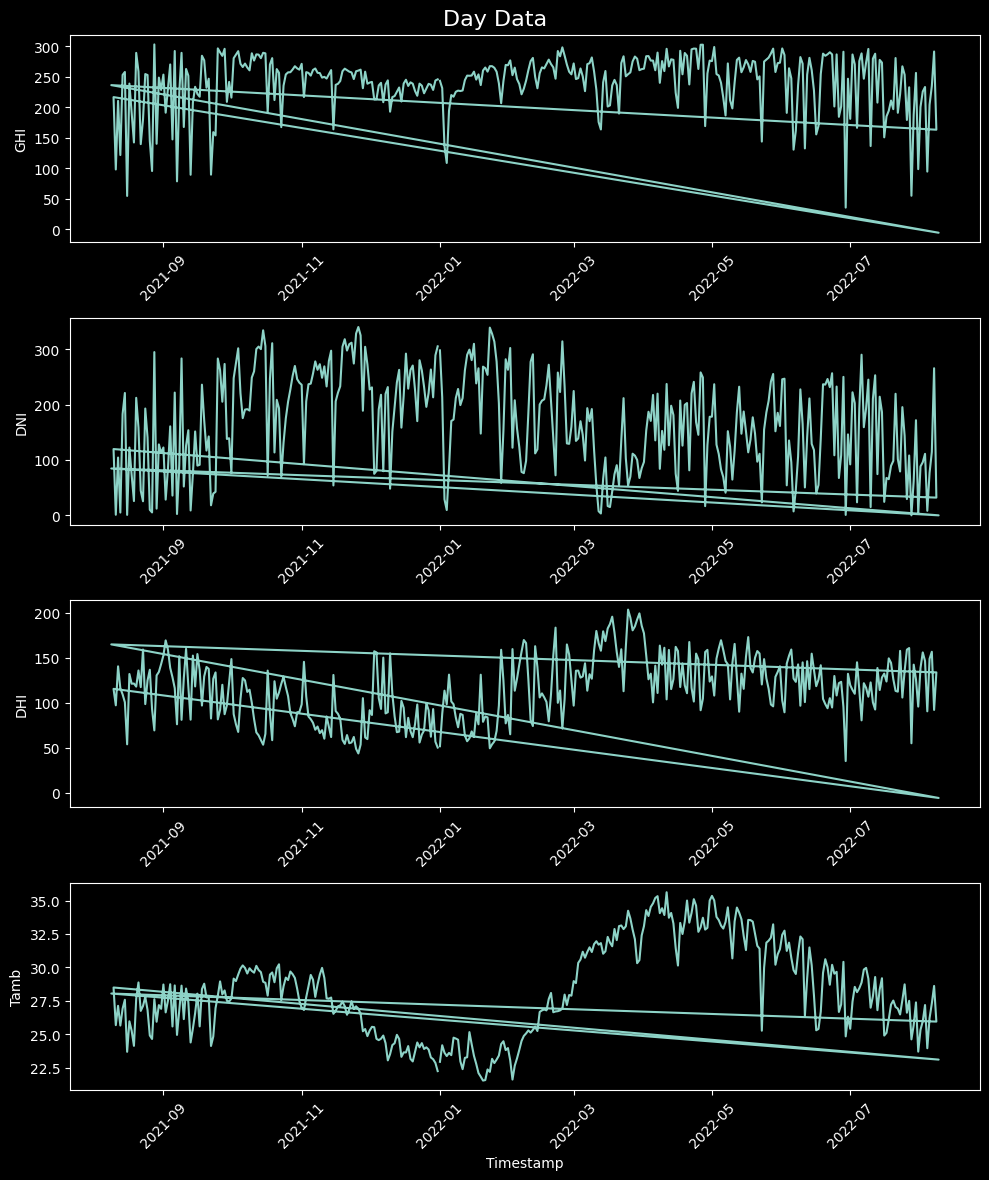

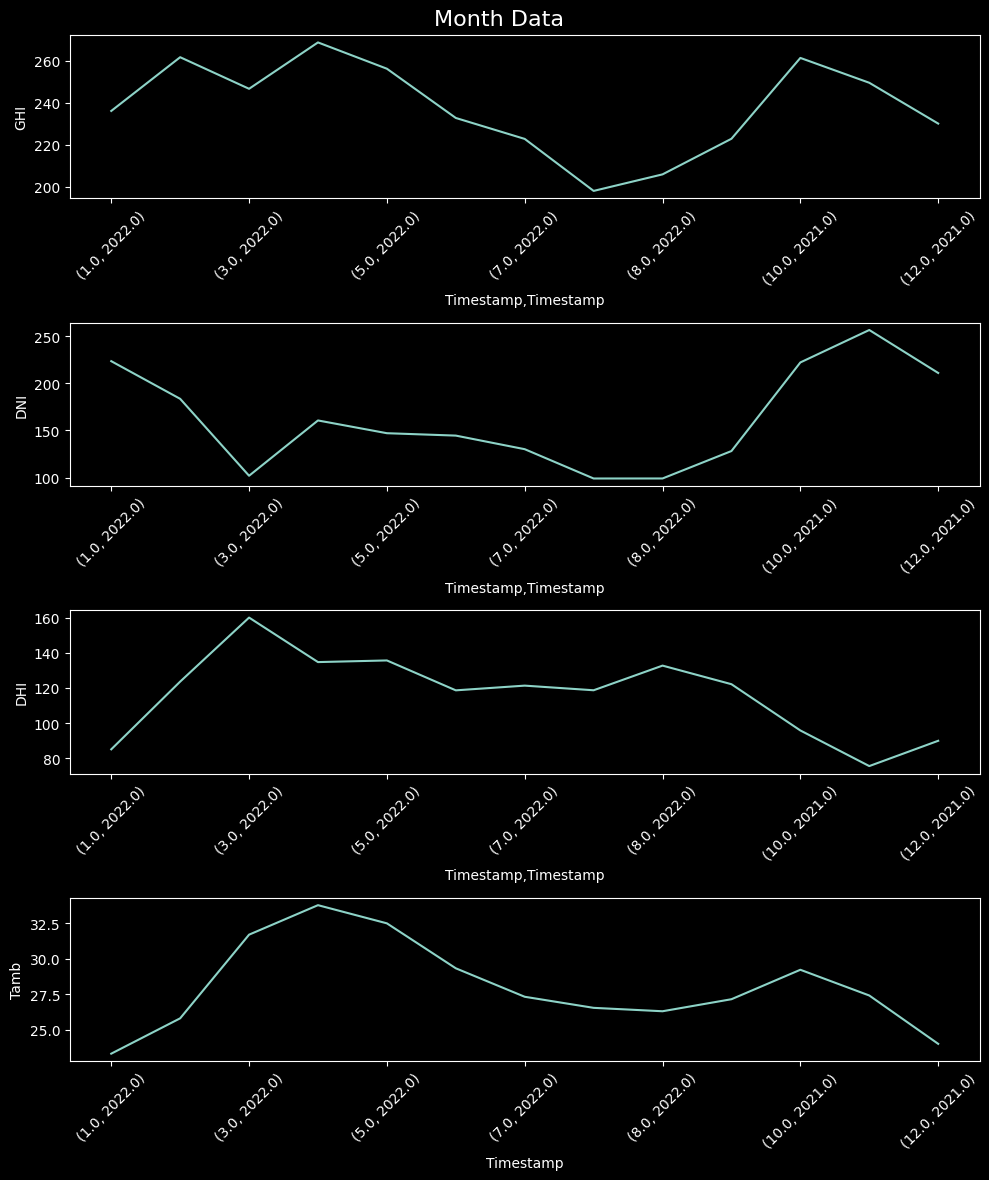

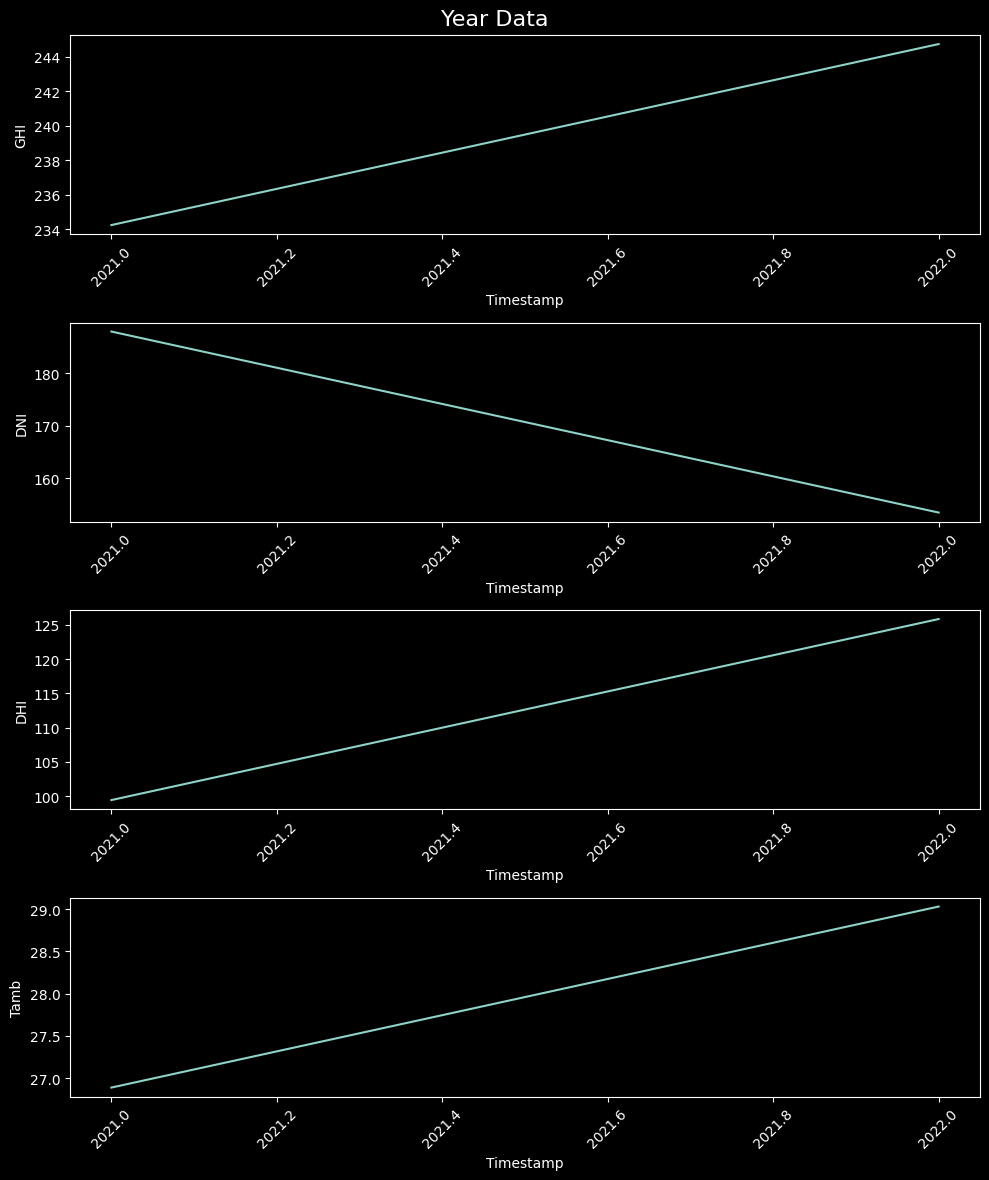

In [49]:
plot_timeseries(benin)

Cleaning Impact

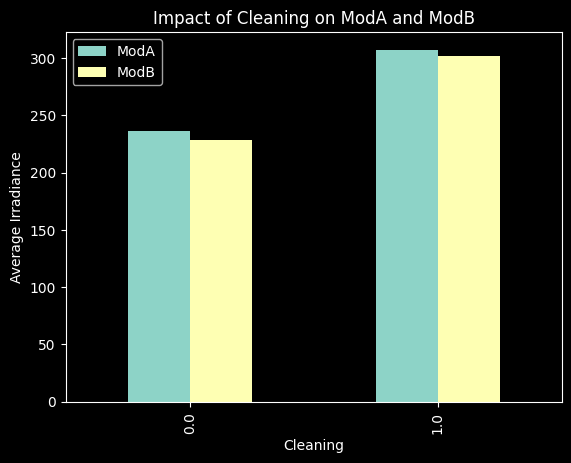

In [50]:
benin.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', title='Impact of Cleaning on ModA and ModB')
plt.ylabel("Average Irradiance")
plt.show()


Correlation Heatmap

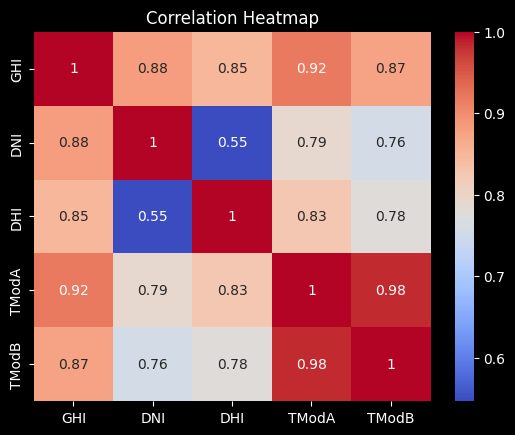

In [51]:
heat_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(benin[heat_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Scatter Plots

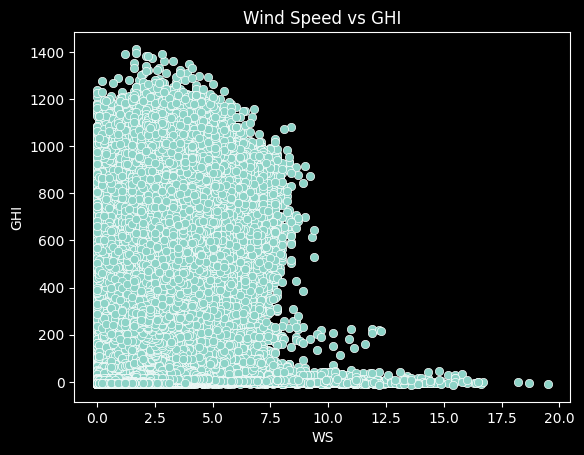

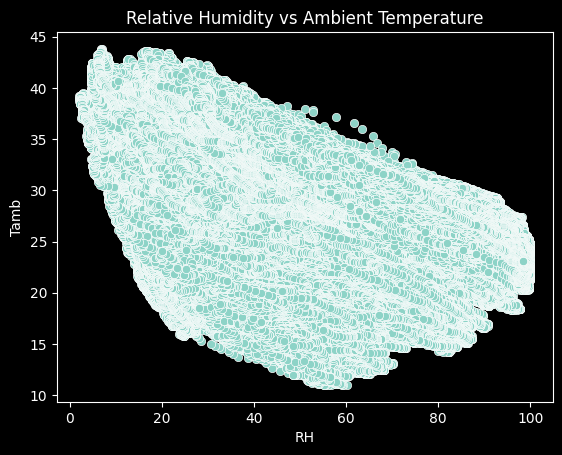

In [52]:
sns.scatterplot(data=benin, x='WS', y='GHI')
plt.title("Wind Speed vs GHI")
plt.show()

sns.scatterplot(data=benin, x='RH', y='Tamb')
plt.title("Relative Humidity vs Ambient Temperature")
plt.show()

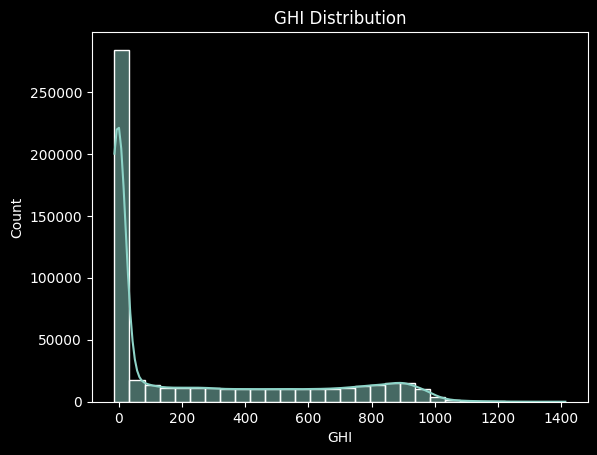

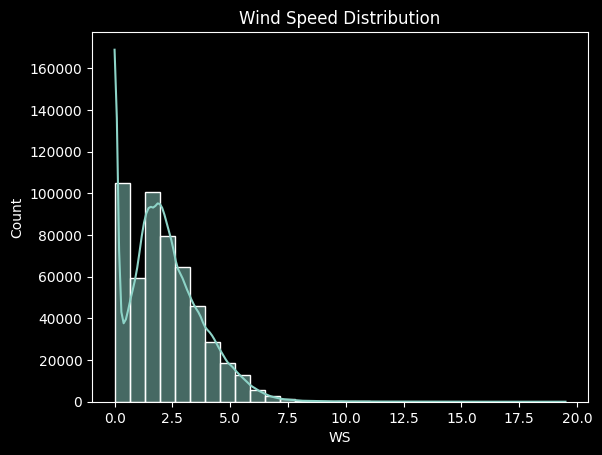

In [53]:
sns.histplot(benin['GHI'], bins=30, kde=True)
plt.title("GHI Distribution")
plt.show()

sns.histplot(benin['WS'], bins=30, kde=True)
plt.title("Wind Speed Distribution")
plt.show()

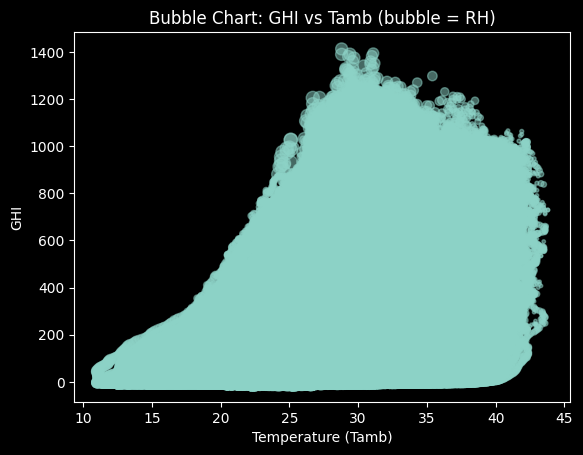

In [54]:
plt.scatter(benin['Tamb'], benin['GHI'], s=benin['RH'], alpha=0.5)
plt.xlabel("Temperature (Tamb)")
plt.ylabel("GHI")
plt.title("Bubble Chart: GHI vs Tamb (bubble = RH)")
plt.show()